In [5]:
import pandas as pd
import ast

# Load the data
file_path = 'results_temp/comparison_ps2_200.csv'
data = pd.read_csv(file_path)

# Display the first few rows of the dataframe and a summary of the data
pd.set_option('display.max_rows', None)
for i in data["non_dominated"]:
    print(len(ast.literal_eval(i)), i)
data


5 [0, 1, 2, 3, 4]
5 [0, 1, 2, 3, 4]
5 [0, 1, 2, 3, 4]
5 [0, 1, 2, 3, 4]
5 [0, 1, 2, 3, 4]
5 [0, 1, 2, 3, 4]
5 [0, 1, 2, 3, 4]
5 [0, 1, 2, 3, 4]
5 [0, 1, 2, 3, 4]
5 [0, 1, 2, 3, 4]


,IpwEpsGreedy,IpwBootTS,RandomAction,eps_greedy_policy,optimal_outcome_actions,PolicyScreeningEpsGreedy,non_dominated
0,1827.895385,1735.182509,1327.557518,1,2097.166950,1631.951386,"[0, 1, 2, 3, 4]"
1,1620.725453,1531.445781,1181.019271,4,2151.629316,1814.051030,"[0, 1, 2, 3, 4]"
2,1550.604303,1881.926864,1242.819589,1,1810.731503,1297.468279,"[0, 1, 2, 3, 4]"
3,1672.832099,1596.554965,1229.490774,1,2300.925359,1697.294229,"[0, 1, 2, 3, 4]"
4,1803.482466,1354.802439,1520.520420,4,2020.433340,1449.717071,"[0, 1, 2, 3, 4]"
5,1577.696842,1183.298395,1305.923260,4,2184.098173,1640.424385,"[0, 1, 2, 3, 4]"
6,1327.329748,1726.800872,1199.566924,1,1982.169723,1196.715787,"[0, 1, 2, 3, 4]"
7,1596.687277,1621.445127,1555.943807,4,2202.681583,1539.118469,"[0, 1, 2, 3, 4]"
8,1768.635730,1681.072771,1683.536163,4,2203.001509,1374.002064,"[0, 1, 2, 3, 4]"
9,1623.954394,1564.025269,1371.045886,4,2074.850201,1582.847524,"[0, 1, 2, 3, 4]"


In [6]:
# Create new "regret" columns by subtracting other columns from "optimal_outcome_actions"
for column in data.columns:
    if column not in ['optimal_outcome_actions', 'eps_greedy_policy', 'optimal_policy', 'non_dominated']:
        data[f'regret_{column}'] = data['optimal_outcome_actions'] - data[column]

# Calculate the accumulative regret for each "regret" column
for column in data.columns:
    if 'regret_' in column:
        data[f'accumulative_{column}'] = data[column].cumsum()

# Display the first few rows of the modified dataframe to verify the new columns
data.head()


,IpwEpsGreedy,IpwBootTS,RandomAction,eps_greedy_policy,optimal_outcome_actions,PolicyScreeningEpsGreedy,non_dominated,regret_IpwEpsGreedy,regret_IpwBootTS,regret_RandomAction,regret_PolicyScreeningEpsGreedy,accumulative_regret_IpwEpsGreedy,accumulative_regret_IpwBootTS,accumulative_regret_RandomAction,accumulative_regret_PolicyScreeningEpsGreedy
0,1827.895385,1735.182509,1327.557518,1,2097.166950,1631.951386,"[0, 1, 2, 3, 4]",269.271565,361.984441,769.609432,465.215564,269.271565,361.984441,769.609432,465.215564
1,1620.725453,1531.445781,1181.019271,4,2151.629316,1814.051030,"[0, 1, 2, 3, 4]",530.903862,620.183534,970.610045,337.578286,800.175428,982.167976,1740.219477,802.793850
2,1550.604303,1881.926864,1242.819589,1,1810.731503,1297.468279,"[0, 1, 2, 3, 4]",260.127200,-71.195361,567.911915,513.263224,1060.302628,910.972615,2308.131391,1316.057074
3,1672.832099,1596.554965,1229.490774,1,2300.925359,1697.294229,"[0, 1, 2, 3, 4]",628.093260,704.370395,1071.434586,603.631131,1688.395888,1615.343009,3379.565977,1919.688204
4,1803.482466,1354.802439,1520.520420,4,2020.433340,1449.717071,"[0, 1, 2, 3, 4]",216.950874,665.630901,499.912920,570.716269,1905.346762,2280.973910,3879.478897,2490.404473


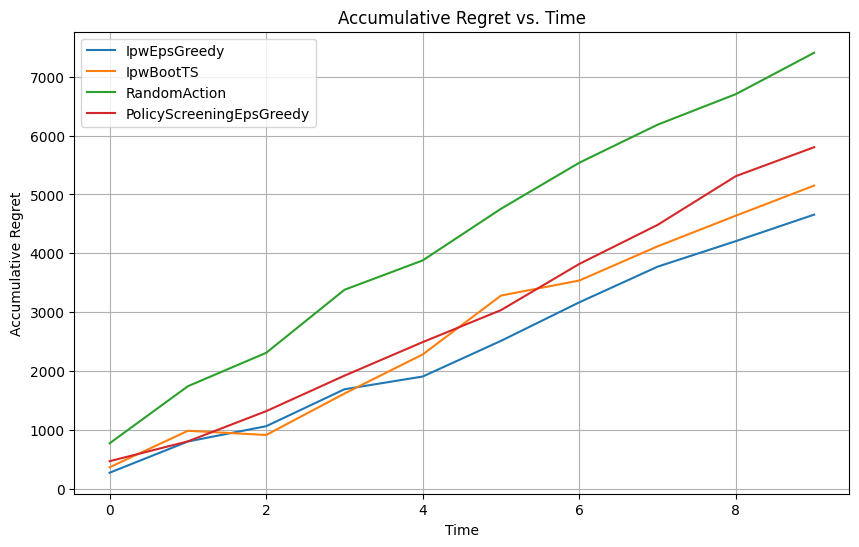

In [7]:
import matplotlib.pyplot as plt

# Plot accumulative regret vs. time (index)
fig, ax = plt.subplots(figsize=(10, 6))

# Iterate over columns to plot accumulative regret for each relevant column
for column in data.columns:
    if 'accumulative_regret_' in column:
        ax.plot(data.index, data[column], label=column.replace('accumulative_regret_', ''))

ax.set_xlabel('Time')
ax.set_ylabel('Accumulative Regret')
ax.set_title('Accumulative Regret vs. Time')
ax.legend()

plt.grid(True)
plt.show()


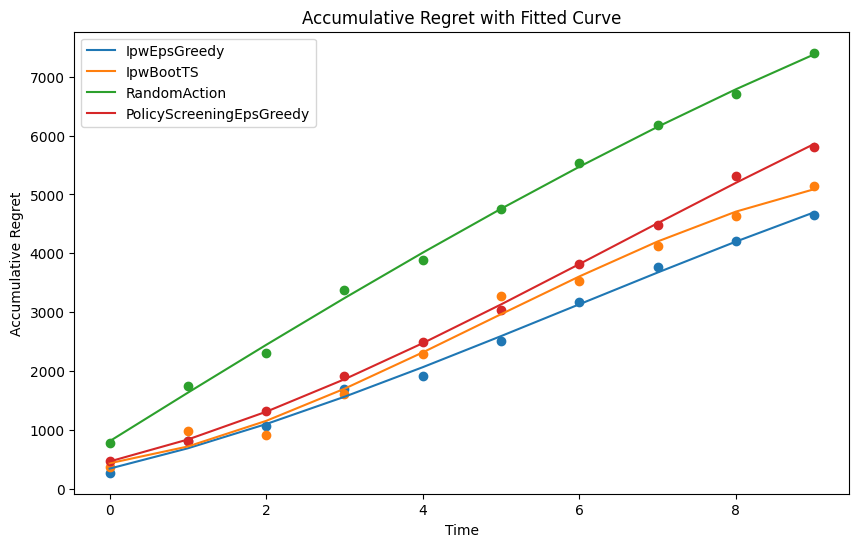

In [8]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.optimize import curve_fit

# Define the time index as x
x = np.arange(len(data))

# Define a function to fit the curve, using a polynomial function for simplicity
def poly_func(x, a, b, c, d):
    return a * x**3 + b * x**2 + c * x + d

# Fit the curve

plt.figure(figsize=(10, 6))

# Iterate over columns to plot accumulative regret for each relevant column
for column in data.columns:
    if 'accumulative_regret_' in column:
        y = data[column].values
        params, params_covariance = curve_fit(poly_func, x, y)
        plt.scatter(x, y)
        plt.plot(x, poly_func(x, *params), label=column.replace('accumulative_regret_', ''))

# Plot the original data and the fitted curve


plt.title('Accumulative Regret with Fitted Curve')
plt.xlabel('Time')
plt.ylabel('Accumulative Regret')
plt.legend()
plt.show()
